24


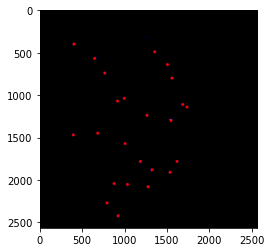

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

hough_min = 5
hough_max = 25
dim = 513
scaleTime = 5
R = []

image = cv2.imread("90deg1hour00262.png")
image = image[0:513, 23:536]
image = cv2.resize(image, (dim * scaleTime, dim * scaleTime),interpolation = cv2.INTER_AREA)
blur = cv2.blur(image, (2,2))
shifted = cv2.pyrMeanShiftFiltering(blur, 2, 15)
grey = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
#filename = 'BS.png'
#cv2.imwrite(filename, grey) 
thresh = cv2.adaptiveThreshold(grey,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,3,2)


detected_circles = cv2.HoughCircles(grey, cv2.HOUGH_GRADIENT, 2, 25, param1=50, param2=30, minRadius=hough_min, maxRadius=hough_max)
detected_circles = np.uint16(np.around(detected_circles))


if detected_circles is not None:
    n = 0
    detected_circles = np.uint16(np.around(detected_circles))
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        cv2.circle(image, (a, b), r, (255, 0, 0), -1)
        n = n + 1
        radius = 'r' + str(n) + ' = ' + str(r)
        #print(radius)
        R.append(r)

number_alpha = len(R)
print(number_alpha)
plt.imshow(thresh)
plt.imshow(image)
plt.show()


In [2]:
import glob
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

hough_min = 5
hough_max = 25
dim = 513
scaleTime = 5

def count_alpha_circle_detection(filename):#method of circle detection
    R = []
    image = cv2.imread(filename)
    image = image[0:513, 23:536]
    image = cv2.resize(image, (dim * scaleTime, dim * scaleTime),interpolation = cv2.INTER_AREA)
    blur = cv2.blur(image, (2,2))
    shifted = cv2.pyrMeanShiftFiltering(blur, 2, 15)
    grey = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(grey,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,3,2)
    
    detected_circles = cv2.HoughCircles(grey, cv2.HOUGH_GRADIENT, 2, 25, param1=50, param2=30, minRadius=hough_min, maxRadius=hough_max)
    detected_circles = np.uint16(np.around(detected_circles))


    if detected_circles is not None:
        n = 0
        detected_circles = np.uint16(np.around(detected_circles))
        for pt in detected_circles[0, :]:
            a, b, r = pt[0], pt[1], pt[2]
            cv2.circle(image, (a, b), r, (255, 0, 0), -1)
            n = n + 1
            radius = 'r' + str(n) + ' = ' + str(r)
            #print(radius)
            R.append(r)
    number_alpha = len(R)
    return number_alpha

path = 'C:\\Users\\exet4533\\Desktop\\B9_Rutherford_Scattering\\Aluminim\\0deg1hourRImageFile'
num_alpha_in_frame = []
for filename in glob.glob(os.path.join(path, '*.png')):
    num_alpha_in_frame.append(count_alpha_circle_detection(filename))
    
print(num_alpha_in_frame)
num_alpha_total = np.sum(num_alpha_in_frame)
time_to_measure = 3603 # time of measurement = 1 hour and 3 seconds
rate = num_alpha_total/time_to_measure
print(rate)
np.savetxt(path + '\\num_alpha.txt', num_alpha_in_frame,fmt='%d', delimiter = '')
f = open(path + '\\rate.txt', 'w')
f.write(str(rate))
f.close()

[13, 20, 18, 28, 27, 13, 18, 17, 20, 20, 18, 14, 22, 13, 23, 19, 16, 21, 17, 23, 11, 18, 20, 20, 28, 15, 15, 12, 18, 14, 27, 21, 24, 20, 17, 26, 16, 14, 26, 19, 19, 20, 9, 20, 20, 11, 24, 16, 22, 22, 16, 19, 20, 16, 22, 23, 16, 20, 19, 13, 24, 19, 21, 19, 24, 26, 20, 19, 25, 14, 23, 14, 19, 10, 19, 33, 21, 24, 23, 15, 15, 12, 27, 19, 25, 15, 21, 14, 23, 19, 19, 19, 13, 26, 20, 25, 16, 22, 26, 18, 15, 22, 22, 17, 18, 19, 24, 28, 13, 20, 20, 20, 20, 23, 15, 18, 11, 16, 26, 18, 16, 20, 23, 16, 20, 15, 21, 21, 14, 22, 10, 19, 19, 17, 19, 18, 12, 20, 22, 14, 17, 24, 21, 20, 16, 26, 10, 19, 21, 17, 22, 16, 14, 12, 15, 18, 22, 18, 14, 14, 18, 19, 14, 17, 15, 16, 16, 12, 17, 28, 16, 18, 13, 14, 16, 18, 17, 10, 22, 20, 24, 20, 16, 28, 17, 15, 15, 22, 18, 15, 14, 21, 17, 23, 12, 23, 11, 20, 13, 17, 16, 11, 19, 18, 9, 21, 17, 22, 26, 19, 8, 18, 18, 15, 24, 13, 30, 16, 23, 16, 26, 17, 17, 15, 18, 20, 8, 18, 24, 17, 17, 18, 13, 19, 16, 24, 19, 21, 12, 20, 25, 21, 30, 20, 18, 20, 19, 23, 23, 14, 18,